In [1]:
import os
import matplotlib.pyplot as plt
from interstellar import Tracks, set_seed
import numpy as np

In [2]:
seed = 101
name = 'tracks_04b'
tracks_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
tracks = Tracks(name=name)
tracks.load(tracks_path)

In [3]:
tracks.get_metadata().head()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.00,0.24,-0.1,2.3,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.94,0.32,0.0,2.5,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.92,0.28,-0.3,1.7,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.91,0.32,0.0,2.5,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.01,0.30,-0.1,2.5,0.0,1


In [4]:
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,gradient
0,1,1.0,0.24,-0.1,2.3,0.101718,0.011245,5761.7700,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.23111,0.010772,0.000202
1,1,1.0,0.24,-0.1,2.3,0.115514,0.012770,5762.3745,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.01129,0.010772,0.000203
2,1,1.0,0.24,-0.1,2.3,0.132069,0.014600,5762.9420,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.78581,0.010772,0.000207
3,1,1.0,0.24,-0.1,2.3,0.151936,0.016796,5763.4970,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.55112,0.010772,0.000216
4,1,1.0,0.24,-0.1,2.3,0.175776,0.019431,5764.0933,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.30295,0.010772,0.000233


In [9]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 
          'initial_Yinit', 'initial_Zinit',]
y_cols = ['star_age', 'effective_T', 'radius',
          'delta_nu_fit', 'star_feh']

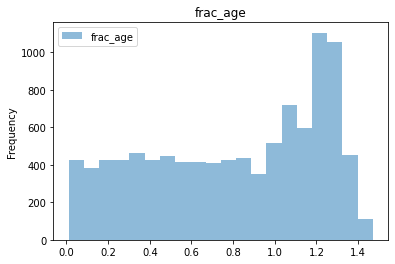

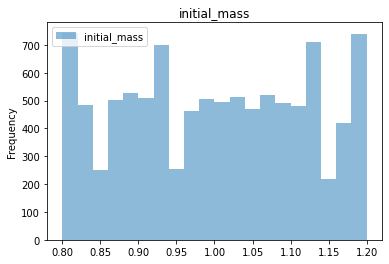

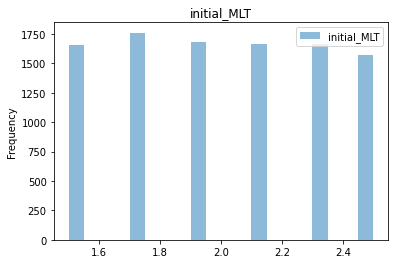

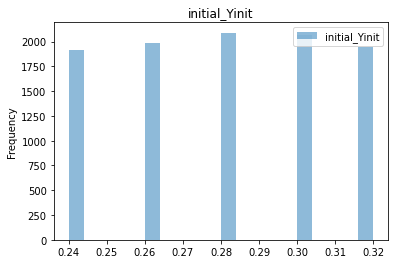

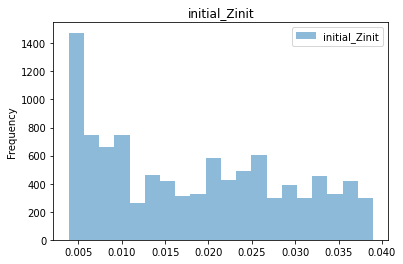

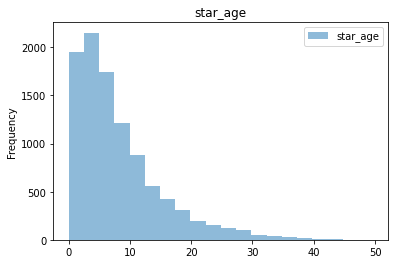

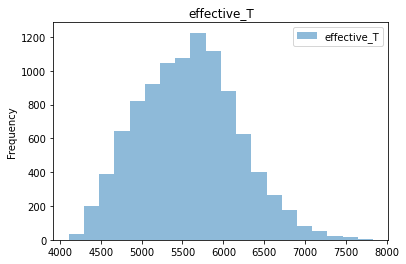

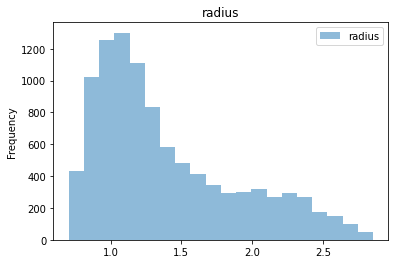

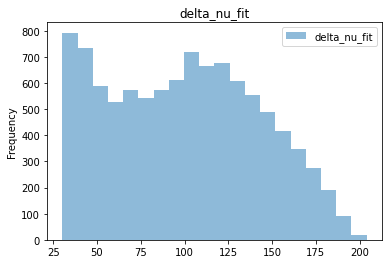

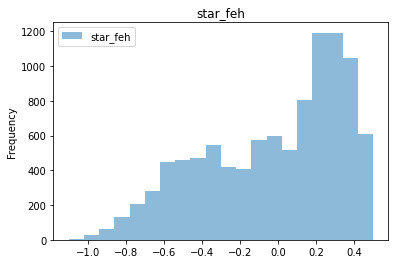

In [10]:
for col in x_cols+y_cols:
    fig, ax = plt.subplots()
    tracks.sample_data(number=10000).plot(ax=ax, kind='hist',
                           y=col, bins=20, alpha=0.5)
    ax.set_title(col)

## Choose log cols

From these histograms it makes sense to log star age and radius, with everything else to be scaled in the training set.

In [13]:
log_cols = ['star_age', 'radius']

tracks.log10(columns=log_cols, inplace=True)

In [14]:
tracks._data.drop(columns=log_cols, inplace=True)

## Train Validation split

Choose the train-validation split by sampling 80% of the tracks data and then 

In [15]:
train = tracks.sample_data(fraction=0.8, random_state=seed)

In [22]:
val = tracks._data.loc[~tracks._data.index.isin(train.index)]

In [25]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 7735733
Length of validation data = 1933933


In [28]:
train.to_csv(os.path.join(tracks_path, f'{tracks.name}_train.csv'), index=False)
val.to_csv(os.path.join(tracks_path, f'{tracks.name}_val.csv'), index=False)